<a href="https://colab.research.google.com/github/Astroid66/IPL-Machine-Learning-Project/blob/main/IPL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("/content/matches.csv")

In [4]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              0
umpire2              0
umpire3            577
dtype: int64

In [5]:
df.drop(['umpire3'],axis='columns',inplace=True)

In [10]:
df['city'].fillna(df['venue'],inplace=True)

In [7]:
df = df[df["winner"].notna()]

In [11]:
df = df[df["umpire1"].notna()]
df = df[df["umpire2"].notna()]

In [12]:
df["team2"]=df["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["team1"]=df["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["winner"]=df["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["toss_winner"]=df["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")

In [13]:
encoder = LabelEncoder()

In [14]:
df["team1"]=encoder.fit_transform(df["team1"])
df["team2"]=encoder.fit_transform(df["team2"])
df["winner"]=encoder.fit_transform(df["winner"].astype(str))
df["toss_winner"]=encoder.fit_transform(df["toss_winner"])
df["venue"]=encoder.fit_transform(df["venue"])

In [16]:
df.loc[df["winner"]==df["team1"],"team1_win"]=1
df.loc[df["winner"]!=df["team1"],"team1_win"]=0

#outcome variable team1_toss_win as a value of team1 winning the toss
df.loc[df["toss_winner"]==df["team1"],"team1_toss_win"]=1
df.loc[df["toss_winner"]!=df["team1"],"team1_toss_win"]=0

#outcome variable team1_bat to depict if team1 bats first
df["team1_bat"]=0
df.loc[(df["team1_toss_win"]==1) & (df["toss_decision"]=="bat"),"team1_bat"]=1
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,team1_win,team1_toss_win,team1_bat
0,1,2008,Bangalore,2008-04-18,6,11,11,field,normal,0,6,140,0,BB McCullum,14,Asad Rauf,RE Koertzen,1.0,0.0,0
1,2,2008,Chandigarh,2008-04-19,0,4,0,bat,normal,0,0,33,0,MEK Hussey,22,MR Benson,SL Shastri,1.0,1.0,1
2,3,2008,Delhi,2008-04-19,9,2,9,bat,normal,0,2,0,9,MF Maharoof,8,Aleem Dar,GA Pratapkumar,0.0,1.0,1
3,4,2008,Mumbai,2008-04-20,7,11,7,bat,normal,0,11,0,5,MV Boucher,34,SJ Davis,DJ Harper,0.0,1.0,1
4,5,2008,Kolkata,2008-04-20,1,6,1,bat,normal,0,6,0,5,DJ Hussey,7,BF Bowden,K Hariharan,0.0,1.0,1


In [18]:
from pandas.io.formats.format import DataFrameRenderer
prediction_df=df[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]

#finding the higly correlated features
correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            column = correlation_matrix.columns[i]
            correlated_features.add(column)
            
prediction_df.drop(columns=correlated_features)

,team1,team2,team1_toss_win,team1_win,venue
0,6,11,0.0,1.0,14
1,0,4,1.0,1.0,22
2,9,2,1.0,0.0,8
3,7,11,1.0,0.0,34
4,1,6,1.0,0.0,7
...,...,...,...,...,...
572,2,11,0.0,0.0,27
573,3,11,0.0,0.0,14
574,12,6,0.0,1.0,8
575,3,12,0.0,0.0,8


In [19]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,team1_win,team1_toss_win,team1_bat
0,1,2008,Bangalore,2008-04-18,6,11,11,field,normal,0,6,140,0,BB McCullum,14,Asad Rauf,RE Koertzen,1.0,0.0,0
1,2,2008,Chandigarh,2008-04-19,0,4,0,bat,normal,0,0,33,0,MEK Hussey,22,MR Benson,SL Shastri,1.0,1.0,1
2,3,2008,Delhi,2008-04-19,9,2,9,bat,normal,0,2,0,9,MF Maharoof,8,Aleem Dar,GA Pratapkumar,0.0,1.0,1
3,4,2008,Mumbai,2008-04-20,7,11,7,bat,normal,0,11,0,5,MV Boucher,34,SJ Davis,DJ Harper,0.0,1.0,1
4,5,2008,Kolkata,2008-04-20,1,6,1,bat,normal,0,6,0,5,DJ Hussey,7,BF Bowden,K Hariharan,0.0,1.0,1


In [26]:
X_train, X_test, y_train, y_test = train_test_split(prediction_df,df['winner'],test_size=0.2, random_state=0,shuffle=True)

In [29]:
svm=SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print('Accuracy of SVM Classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)*100))

Accuracy of SVM Classifier on test set: 31.3043


In [32]:
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
y_pred1 = randomForest.predict(X_test)
print('Accuracy of Random Forest Classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)*100))


Accuracy of Random Forest Classifier on test set: 80.0000


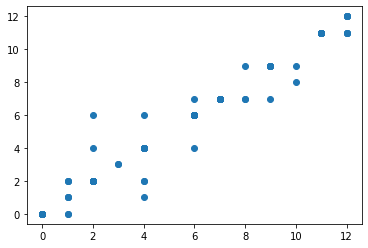

In [33]:
plt.scatter(y_test,y_pred1)

In [35]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred2 = dtree.predict(X_test)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)*100))


Accuracy of Decision Tree Classifier on test set: 88.6957


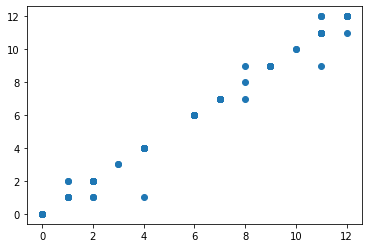

In [36]:
plt.scatter(y_test,y_pred2)
